<a href="https://colab.research.google.com/github/JinnieL/Sentiment_Analysis/blob/main/KoBERT%20%ED%99%98%EA%B2%BD%20%EC%84%A4%EC%A0%95%20%EB%B0%8F%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%20%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 3.7.0 버전 설치

In [1]:
# # 2024/09/04 파이썬 버전 변경
# ! python --version        # 버전 확인

In [2]:
# !sudo apt upgrade
# !sudo apt install python3.7

In [3]:
# ! python --version

In [4]:
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

In [5]:
# !sudo update-alternatives --config python3

In [6]:
# !python --version
# !pip --version

In [7]:
# pip 설치
# !sudo apt install python3-pip

In [8]:
# !python --version
# !pip --version

In [9]:
# # ModuleNotFoundError 해결 - distutils.util 설치
# !sudo apt install python3.7-distutils

In [10]:
# !python --version
# !pip --version

# 한글 깨짐 방지 설정

In [11]:
# 한글 깨짐을 방지한 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [12]:
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Colab 환경 세팅

In [13]:
!pip install mxnet
!pip install gluonnlp==0.8.0
!pip install tqdm pandas
!pip install sentencepiece
!pip install transformers
!pip install torch

# KoBERT 모델을 Colab에 설치하기

In [14]:
# !pip install git+https://git@github.com/SKTBrain/KoBERT.git@master        # onnxruntime version error
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'
# !pip install onnxruntime

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-444ax8cs/kobert-tokenizer_370897da588c402faea7e13a3afcf20a
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-444ax8cs/kobert-tokenizer_370897da588c402faea7e13a3afcf20a
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done


In [15]:
# koBERT
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

# Transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [16]:
!pip install numpy==1.23.1

In [17]:
# Setting Library
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm import tqdm, tqdm_notebook

/usr/local/lib/python3.10/dist-packages/mxnet/optimizer/optimizer.py:163: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  warnings.warn('WARNING: New optimizer %s.%s is overriding '


In [18]:
import numpy as np
import pandas as pd

# Colab GPU 활용
device = torch.device("cuda:0")

# BERT 모델, Vocabulary 불러오기
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

# Data Concatenation

In [19]:
conv_df = pd.read_excel("/content/Data/감성대화말뭉치(최종데이터)_Training.xlsx")
conv_df.head(10)

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
5,6,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.,진로에 대해서 고민하고 계시는군요. 어떤 점이 고민인가요?,직장 상사한테 자주 지적을 받아. 그럴 때마다 이 업무는 나랑 맞지 않는 거 같이 ...,업무가 나와 맞지 않아 시간을 버리는 것 같이 느껴지셨군요.,NaN,NaN
6,7,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.,부모님의 노여움에 섭섭하시군요. 이런 상황을 어떻게 해결하면 좋을까요?,부모님께 좀 더 시간을 달라고 해야겠어. 진로 테스트를 받아볼까 생각 중이야.,진로 테스트를 받아보겠다고 부모님께 말씀드릴 생각이군요.,NaN,NaN
7,8,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,더 좋은 회사가 기다리고 있을지도 모르는데 쉬고 있기가 좀 그래.,좋은 일자리를 놓치고 싶지 않아 끊임없이 노력하시는군요. 하는 일이 잘 풀리시길 바라요.,NaN,NaN
8,9,청년,여성,"진로,취업,직장",해당없음,불안,걱정스러운,졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.,취업에 대해 걱정이 되는군요.,응. 느긋함을 느끼는 내가 좀 싫었는데 걱정을 많이 하는 것보다는 낫다는 생각도 들어.,걱정보다는 느긋한 태도가 낫다고 생각하시는군요.,NaN,NaN
9,10,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,우리 회사는 복지가 정말 좋아! 내가 곧 출산하게 되는데 육아휴직 기간도 긴 데다가...,예비 엄마들에게는 정말 꿈의 회사인 것 같네요. 마음이 편하시겠어요.,NaN,NaN


In [20]:
print(conv_df.shape)
print(conv_df.isnull().sum())

(51630, 13)
Unnamed: 0       0
연령               0
성별               0
상황키워드            0
신체질환             0
감정_대분류           0
감정_소분류           0
사람문장1            0
시스템문장1           0
사람문장2            0
시스템문장2           0
사람문장3         8935
시스템문장3        8935
dtype: int64


In [21]:
conv_val_df = pd.read_excel("/content/Data/감성대화말뭉치(최종데이터)_Validation.xlsx")
conv_val_df.sample(10)

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
6076,6077,청년,여성,대인관계,해당없음,불안,혼란스러운,결혼하고 나서 친구들과 멀어진 건지 혼란스러워.,친구들과 멀어진 것 같으세요?,결혼하면서 살던 지역이 아닌 다른 지역으로 와서 만나기가 어려워.,만나기 어려워서 더 속상하신 것 같아요.,NaN,NaN
2639,2640,노년,남성,대인관계,만성질환 무,분노,안달하는,오랜만에 온 가족이 모여 외식을 하면 좋겠다고 했는데 아무도 알아보고 있지 않아서 ...,외식에 대해 아무도 알아보지 않는 가족들에게 서운함과 분노를 느끼고 계시는군요.,가족들의 도움 없이 나 혼자 외식에 대해 알아보려니 너무 힘이 들어.,외식에 관해 혼자 찾는 것이 힘드시군요. 이 문제에 관해 가족들에게 어떻게 얘기할 ...,온 가족이 모여 하는 외식이니 가족들에게 다 함께 외식에 대해 알아보자고 제안해야겠어.,가족들과의 대화가 잘 풀리시면 좋겠어요.
1110,1111,중년,여성,"대인관계(부부, 자녀)",해당없음,당황,한심한,남편은 집에서 손 하나 까딱 하지 않으려고 해.,남편이 아무것도 하지 않으려고 하는군요. 힘드시겠어요.,남편이 집에서 하는 일이 없으니까 내가 너무 할 일이 많아. 힘들어,많이 힘드시겠어요. 좋은 해결방법은 뭐라고 생각하세요?,남편한테 이야기를 해봐야겠어. 이렇게 살다간 나만 너무 힘이 들 것 같아.,대화를 통해 좋은 해결방법을 찾으시면 좋겠어요.
3250,3251,노년,남성,"건강,죽음",만성질환 무,분노,분노,아내가 나는 영양제 이런 건 필요 없고 밥만 먹으라고 하는데 너무 화가 나.,아내분이 영양제를 챙겨주시지 않아 기분이 안 좋으시겠어요.,밥으로 보충할 수 없는 것들을 영양제로 먹는 건데 아내는 이를 모르는 것 같아.,아내분이 모르는 이 상황에서 할 수 있는 게 어떤 것이 있을까요?,아내에게 책을 사줘서 영양제의 필요성을 알려줘야겠어.,아내분이 대화를 통해 영양제의 필요성을 알게 되길 바라요.
6345,6346,청년,남성,대인관계,해당없음,기쁨,신이 난,요새 밴드 모임에 참석하니 매우 재미있고 흥미로워.,새로운 모임에서 무엇을 하며 신이 나셨나요?,취미와 공통 관심사가 비슷한 사람들과 만나서 대화하며 관계를 맺고 살아가는 것 자체...,새로운 시도가 생활에 활력이 되셨네요.,서로의 마음을 개방할 수 있어서 그 어떤 때보다도 더 소중하고 즐거운 시간을 보내는...,마음을 열고 만나는 사람들의 관계에서 즐거움을 느끼시나 봐요.
3977,3978,청소년,남성,학교폭력/따돌림,해당없음,상처,괴로워하는,학교폭력 피해학생이 심하게 맞고 있는데 내가 해 줄 수 있는 게 아무것도 없어.,폭력이 일어났는데 해 줄 수 있는 게 없다니 너무 괴롭고 힘들겠어요.,보고 있자니 너무 괴로워서 미쳐 버릴 거 같아.,지금 상황을 변화시키기 위해 시도해 볼 수 있는 일들이 어떤 것이 있을까요?,잘 모르겠어. 선생님들을 모셔 와야 하나.,지금 상황을 어떻게 해야 할지 함께 상의할 수 있는 사람이 주변에 있었으면 좋겠네요.
5097,5098,노년,남성,재정,만성질환 무,당황,외로운,경제적인 수준 차이가 나니까 친구들 여행에도 동참 못 하고 외롭다.,외로우시겠어요. 여행은 어디로 가나요?,해외여행이야. 국내면 무리라도 해서 갈 텐데 진짜 아쉽고 외롭다.,재정이 부족해서 여행에 동참을 못 하시니 아쉬운 거군요?,NaN,NaN
6469,6470,청년,남성,"연애,결혼,출산",해당없음,불안,초조한,나이가 점점 들어가서 결혼을 빨리해야 하는데 초조하네.,나이가 들어갈수록 결혼 문제 때문에 고민이 많으시군요.,친구들은 모두 장가가고 나만 혼자여서 더 마음이 조급한 것 같아.,친구 중에 혼자만 남아서 더 힘드시다는 거네요. 결혼을 서두르려면 어떻게 해야 할까요?,NaN,NaN
1612,1613,청소년,남성,가족관계,해당없음,당황,혐오스러운,남동생이 학교에서 친구들에게 돈을 빼앗았다는 얘기를 들으니 너무 당황스러워.,동생의 행동에 당황스러운 감정을 느끼셨군요.,내 동생이 남의 물건을 뺏고 괴롭히고 한다는 게 너무 꼴 보기 싫어.,이런 감정일 때는 어떻게 하면 그 감정에서 벗어날 수 있을까요?,우선 남동생을 잘 타일르고 그래도 안되는건 안된다고 따끔하게 말할래.,동생을 잘 타일러서 좋은 변화가 일어났으면 좋겠네요.
2124,2125,중년,남성,"대인관계(부부, 자녀)",해당없음,분노,툴툴대는,자식들이 점점 말이 짧아지는 거 같아 기분이 좋지 않아.,자식들의 태도 때문에 기분이 좋지 않으시군요.,어릴 때는 존댓말을 했었는데 이제는 점점 반말을 해.,이제는 반말을 해서 화가 나시는군요. 이 상황을 어떻게 해결할 수 있을까요?,자식들을 모아놓고 따끔하게 한마디 해야겠어. 부모를 공경하라고 말이야.,자식들과 대화를 통해 문제가 잘 해결되면 좋겠어요.


In [22]:
print(conv_val_df.shape)
print(conv_val_df.isnull().sum())

(6641, 13)
Unnamed: 0       0
연령               0
성별               0
상황키워드            0
신체질환             0
감정_대분류           0
감정_소분류           0
사람문장1            0
시스템문장1           0
사람문장2            0
시스템문장2           0
사람문장3         1955
시스템문장3        1955
dtype: int64


감성대화말뭉치 train & validation data set과 단발성 데이터 셋을 모두 합친 뒤 train, validation, test 데이터 비율을 6 : 2 : 2로 split

In [23]:
# train & validation data set concatenate
conv_df = pd.concat([conv_df, conv_val_df])
conv_df = conv_df.reset_index(drop=True)
conv_df.sample(10)

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
54171,2542,노년,남성,"건강,죽음",만성질환 무,분노,구역질 나는,김 씨는 나랑 음식 취향이 정말 안 맞는 것 같아.,음식 취향이 안 맞아서 곤란하시군요.,김 씨가 먹는 건 다 징그러운 음식들이라 구역질 나서 같이 식사하기 싫어.,같이 식사를 하기 싫다니 어떤 방법이 좋을까요?,앞으로 김 씨와의 식사 자리는 피하는 것이 좋겠어.,식사 자리를 피할 수 있으시길 바라요.
25707,25708,노년,여성,"건강,죽음",만성질환 무,당황,남의 시선을 의식하는,내 나이가 벌써 아흔 살이 넘었어. 자식들은 내가 아직 살아있는 게 불만인 것 같아.,자녀들의 부정적인 감정을 느껴서 마음이 슬프시군요.,생일마다 이제 형식적으로 나를 대하는 느낌이 들어.,자녀분들의 태도에 상처받으셨군요. 상처를 달래기 위해 할 수 있는 일이 있을까요?,그냥 내가 요새 마음이 안 좋은 건가? 한번 이야기를 해 볼까?,자녀들과 대화를 해볼까 고민이 되시는군요. 속상한 마음이 위로되시길 바랄게요.
44013,44014,노년,남성,"건강,죽음",만성질환 무,당황,외로운,만성 고혈압으로 돈을 벌기 힘들어서 자식들에게 생활비를 받고 있어. 미안하고 죄책감...,자식에게 짐을 지워준 것 같아 죄책감이 드시는군요.,평생 자식에게 기댈 수도 없는데 앞으로 남은 인생이 무섭고 두려워.,두려운 마음이 나아지기 위해 무엇을 할 수 있을까요?,모르겠어. 이 마음이 나아질 수 있을까?,지금의 감정을 공유할 수 있는 사람이 주위에 있었으면 좋겠어요.
17266,17267,청소년,여성,가족관계,해당없음,슬픔,후회되는,어렸을 때 동생을 많이 괴롭혀서 지금은 많이 미안해.,동생을 이전에 많이 괴롭혔던 것이 많이 미안하시군요.,지금도 서로 대화를 잘 안 해.,동생과의 관계가 어려우시군요. 어떻게 하는 것이 가장 좋은 방법일까요?,내가 먼저 대화를 시도해보고 사과하는 게 좋을 것 같아.,대화를 통해 잘 해결이 되었으면 좋겠어요.
9281,9282,청년,여성,"진로,취업,직장",해당없음,기쁨,안도,경제적으로 좀 더 풍요로워.,경제적으로 풍요로우시군요.,응. 그래서 내가 사고 싶은 거 살 거야.,어떤 게 사고 싶으신가요?,휴대전화 하나 새로 살려고!,좋은 꿈이네요. 응원할게요.
48203,48204,청소년,여성,학업 및 진로,해당없음,불안,혼란스러운,성적이 오르지 않아서 진로 고민이 많아. 안절부절못하겠어.,성적에 대한 고민으로 불안하시군요.,성적을 올리려면 공부를 많이 하는데 실천에 어려움이 많아.,공부를 많이 하기가 어려우시군요. 앞으로 어떻게 하고 싶으신가요?,공부 계획을 세우고 성실하게 학교생활을 하려고 해.,성적이 올라서 진로 고민이 해결되기를 바라요.
22544,22545,청년,여성,"진로,취업,직장",해당없음,불안,취약한,합격자 후기만으로는 내가 제일 어려워하는 면접을 준비하기엔 부족한 것 같아 걱정이야.,면접을 준비하는 것이 어려워 걱정이셨군요.,안 그래도 나는 면접을 잘 못 보는 편인데 어떻게 해야 할지 전혀 모르겠어.,지금 상황에서 어떤 방법이 가장 좋을까요?,그냥 어떻게든 면접을 준비해서 부딪혀봐야겠어.,계속 연습하면서 기분이 나아졌으면 좋겠어요.
43691,43692,노년,여성,대인관계,만성질환 무,상처,고립된,이십 년째 연락이 없는 딸한테 연락하고 싶은데 딸이 연락을 안 받을 것 같아서 우울해.,딸이 연락을 받지 않을 것 같아 우울하시군요.,내가 연락을 한다면 싫어하겠지? 전화를 받지 않을 것 같아서 걱정이야.,딸이 전화를 받지 않을까 걱정이 되시군요. 이러한 상황에서 어떻게 하면 좋을까요?,그래도 한번 연락을 해봐야겠어. 딸이 너무 보고 싶구나.,딸과의 대화로 지금의 상황을 잘 해결하길 바라요.
1112,1113,청년,여성,"진로,취업,직장",해당없음,기쁨,편안한,내가 실수해도 나를 도와줄 사수가 옆에 있어서 든든해.,실수를 해도 도와줄 수 있는 사수가 있어 한결 편안하겠군요.,좋은 사수를 만난 것이 복인 것 같아. 일을 빠르게 배우고 있다고 사수에게 칭찬도 ...,좋은 사수를 만나서 다행이군요. 일을 빨리 배우는 비결이 있을까요?,여러 가지 상황을 많이 접해 보면서 요령을 터득하는 게 비결인 것 같아.,다양한 상황을 경험하면서 요령을 터득하는 것이 비결이군요.
7511,7512,중년,남성,건강,해당없음,불안,취약한,당뇨병 때문에 죽겠어. 매일 혈당 관리하느라 항상 신경 써야 해.,당뇨병 때문에 건강 문제에 항상 신경 쓰느라 노심초사겠어요.,또한 좋아하는 술도 못먹 게 되어서 화까지 나네.,기호식품을 못 먹게 돼서 답답하신 상태군요. 이 답답함을 해결할 방법이 있을까요?,술 말고 취미생활을 만들어보려고. 이왕이면 건강을 생각해서 운동 쪽으로 말이야.,건강한 취미생활로 기존의 건강에 도움이 되지 못하는 식습관을 개선할 수 있게 되면 ...


첫번째 발화에는 감정이 드러나도록 생성된 데이터 셋이고 첫 문장 발화 이후 시스템 응답이나 후속 대화들은 상황에 따라 감정상태가 포함되지 않는 경우도 있음.    
→ 감정상태가 확실하게 드러난 '사람문장1' 컬럼과 '감정_대분류' 컬럼을 사용

In [24]:
print(conv_df.shape)
print(conv_df.isnull().sum())

(58271, 13)
Unnamed: 0        0
연령                0
성별                0
상황키워드             0
신체질환              0
감정_대분류            0
감정_소분류            0
사람문장1             0
시스템문장1            0
사람문장2             0
시스템문장2            0
사람문장3         10890
시스템문장3        10890
dtype: int64


In [25]:
conv_df = conv_df[['사람문장1', '감정_대분류']]
conv_df.head(10)

,사람문장1,감정_대분류
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
5,직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.,분노
6,성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.,분노
7,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,기쁨
8,졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.,불안
9,요즘 직장생활이 너무 편하고 좋은 것 같아!,기쁨


In [26]:
# Warning 무시
import warnings
warnings.filterwarnings('ignore')

  감정_대분류  count
0     기쁨   7339
1     당황   9804
2     분노  10417
3     불안  10433
4     상처  10150
5     슬픔  10128


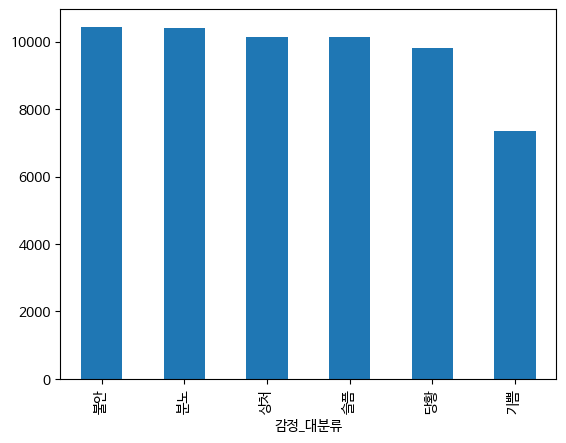

In [27]:
# label 개수 비교
conv_df['감정_대분류'].value_counts().plot(kind='bar')
print(conv_df.groupby('감정_대분류').size().reset_index(name='count'))

In [28]:
sent_df = pd.read_excel("/content/Data/한국어_단발성_대화_데이터셋.xlsx")
sent_df.head(10)

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0
5,남자친구가 떠날까봐요,공포,NaN,NaN,NaN,혐오,5429.0
6,이거 했는데 허리가 아플수도 있나요? ;;,공포,NaN,NaN,NaN,Total,38594.0
7,내가불안해서꾸는걸까..,공포,NaN,NaN,NaN,NaN,NaN
8,일주일도 안 남았당...ㅠㅠ,공포,NaN,NaN,NaN,NaN,NaN
9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,공포,NaN,NaN,NaN,NaN,NaN


In [29]:
sent_df[['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4']].value_counts()

,,,count
Unnamed: 2,Unnamed: 3,Unnamed: 4,



Sentence와 Emotion 컬럼을 제외하고 삭제처리

In [30]:
sent_df = sent_df[['Sentence', 'Emotion']]
sent_df.head(10)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
5,남자친구가 떠날까봐요,공포
6,이거 했는데 허리가 아플수도 있나요? ;;,공포
7,내가불안해서꾸는걸까..,공포
8,일주일도 안 남았당...ㅠㅠ,공포
9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,공포


In [31]:
print(sent_df.shape)
print(sent_df.isnull().sum())

(38594, 2)
Sentence    0
Emotion     0
dtype: int64


  Emotion  count
0      공포   5468
1      놀람   5898
2      분노   5665
3      슬픔   5267
4      중립   4830
5      행복   6037
6      혐오   5429


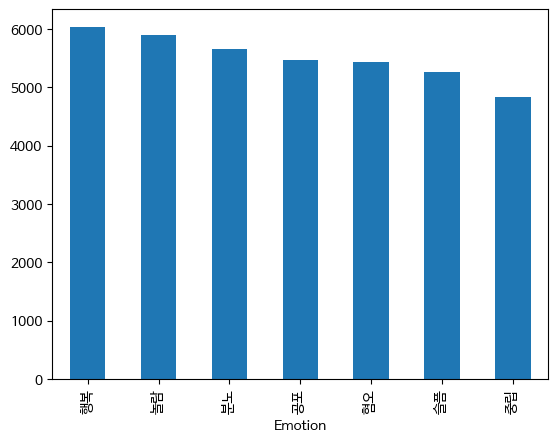

In [32]:
# label 개수 비교
sent_df['Emotion'].value_counts().plot(kind='bar')
print(sent_df.groupby('Emotion').size().reset_index(name='count'))

In [33]:
print(sent_df['Emotion'].value_counts())
print(sent_df['Emotion'].value_counts().sum())

Emotion
행복    6037
놀람    5898
분노    5665
공포    5468
혐오    5429
슬픔    5267
중립    4830
Name: count, dtype: int64
38594


1. 두 개 데이터 셋의 감정 레이블을 통일   
2. 데이터셋을 합치기
3. 레이블 카운트 다시 실행

In [34]:
print(conv_df['감정_대분류'].unique())
print(sent_df['Emotion'].unique())

['분노' '기쁨' '불안' '당황' '슬픔' '상처']
['공포' '놀람' '분노' '슬픔' '중립' '행복' '혐오']


In [35]:
conv_df[conv_df['감정_대분류'] == '당황'].sample(10)

,사람문장1,감정_대분류
47939,내가 오늘 정신 질환이 있는 친구를 놀렸는데 너무 미안해.,당황
3895,여자친구랑 술을 먹다가 너무 많이 먹어서 토했어.,당황
28967,퇴직금도 치료비로 다 써버리고 이젠 나에게 남은 돈은 한 푼도 없어.,당황
1210,조별 과제에서 내가 맡은 부분을 망친 것 같아서 친구들에게 미안해.,당황
44456,이번 기말고사 성적표를 보고 부모님이 싸워. 이게 다 공부 못하는 내 잘못이겠지?,당황
34027,직장 동료를 너무 안이하게 대했던 거 같아 마음이 좋지 않아.,당황
41353,남들은 다 노후 준비에 자신만만한데 정말 비교되네.,당황
20213,지갑이 땅에 떨어져 있길래 주웠는데 주변에 사람이 많아서 내 지갑인 척 했어.,당황
6206,일 때문에 바빠서 십 년 된 친구의 생일을 까먹었어. 내가 너무 한심해.,당황
30611,고등학교 진학을 어디로 할지 모르겠어.,당황


In [36]:
sent_df[sent_df['Emotion'] == '혐오'].sample(10)

,Sentence,Emotion
37200,배터리 용량 크다고 자랑질 하더니만 더 큰 폭탄을 만든 꼴이네,혐오
35285,제가 아는 언니의 친구 한명이 기자(남자)인데 원래 기자들은 다 쓰레기라고 합니다,혐오
33355,개똥싸는 소리하구있네! 웃기지도 않네,혐오
34699,박정희 꼬봉이였군,혐오
37344,그냥 갤럭시 7 쓰는데 이것도 충전할때 발열 진짜 심한데,혐오
35122,정말 이나라에 일본 극우 간첩이 있고 그실체가 새누리당에 연계가 되어있는가!!!!,혐오
33636,불출석은 모든 혐의 인정한다는 뜻....법대로 처리합시다.,혐오
38333,단군이래 최대비리인 엘시티는 보도 안하냐???,혐오
38489,맨날 꾼들 질랑이 처럼 나오는데 그냥 백만이 계속 나오는것임,혐오
37055,아니 못사는집안도 세금은 내려고하는데 저것들은 뭔데 안냄?,혐오


감성대화 말뭉치의 감정 label : 분노, 기쁨, 불안, 당황, 슬픔, 상처   
단발성 대화 세트의 감정 label : 공포, 놀람, 분노, 슬픔, 중립, 행복, 혐오    
두 데이터셋을 합치기 위해 감성대화 말뭉치의 label을 수정.

감정대화 말뭉치의 감정
- 분노 (유지)
- 기쁨 → 행복
- 불안 → 공포
- 상처 → 슬픔
- 당황 → 놀람

단발성 대화 세트의 감정
- 혐오 → 분노
- 중립 감정의 경우 데이터 균형성을 위해 일단 제거. 후에 활용 방안 다시 찾아볼것!

In [37]:
sent_df[sent_df['Emotion'] == '중립'].sample(10)

,Sentence,Emotion
26821,스톤스 브라보가 다 해먹음,중립
25888,터질 때까지는 터진 게 아니다.,중립
23142,암만 비서가 교체했다해도 본인 쓰던 PC인데..이유를 모른다는 건...말이 안되잖아...,중립
22311,가을은 오호츠크해 기단의 영향받는거아니었나?,중립
24989,트럼프 부터 입국금지 시켜야 할듯,중립
26718,고기만먹어야겟군~~~,중립
22995,7S 엣지랑 7노트랑 크게 차이가 없는데 7노트는 왜 잘터지는지 모르것네,중립
22589,A 이후에 푸쉬해줬어야지....,중립
25402,페드로도 20살 넘어서 1군 들어왔음,중립
25640,스마트폰좀비가 예전에 비해 포켓몬고 때문에더욱이 많이 감염되고있다...,중립


In [38]:
# 기쁨 → 행복 / 불안 → 공포 / 상처 → 슬픔
conv_df['감정_대분류'] = conv_df['감정_대분류'].replace('기쁨', '행복')
conv_df['감정_대분류'] = conv_df['감정_대분류'].replace('불안', '공포')
conv_df['감정_대분류'] = conv_df['감정_대분류'].replace('상처', '슬픔')
conv_df['감정_대분류'] = conv_df['감정_대분류'].replace('당황', '놀람')
sent_df['Emotion'] =sent_df['Emotion'].replace('혐오', '분노')
print(conv_df['감정_대분류'].unique())

['분노' '행복' '공포' '놀람' '슬픔']


In [39]:
# conv_df의 컬럼명 변경
conv_df = conv_df.rename(columns={'사람문장1': 'Sentence', '감정_대분류': 'Emotion'})
conv_df.sample(10)

,Sentence,Emotion
42869,난 아주 어릴 때 아이를 가졌고 좋은 아빠가 되고 싶은데 현실은 나도 그냥 애 같아.,분노
31641,병원에서 억울한 일이 있었어.,슬픔
58167,경제적으로 여유가 없으니 주변에서 사람들이 떠나는 것 같아 외로워.,놀람
6279,친구가 옷을 너무 눈에 띄게 입고 다녀서 사람들이 다 쳐다보는 것 같아.,놀람
17369,아내가 아파서 움직이지를 못해. 그래서 내가 책을 보고 죽을 끓였는데 너무 맛이 없어.,슬픔
11027,요즘 애 때문에 너무 힘들어.,분노
52331,남편이 가고 난 후 더 힘들어.,공포
44916,남자친구와 헤어졌는데 그 애가 자살 시도를 했어. 전부 내 탓인 것 같고 너무 무서워.,놀람
20061,나는 예쁜 손주가 매일 보고 싶은데 아들이 손주보러 못 오게 하네.,분노
16504,일을 하다 다쳐서 보험금이 나오나 기대 했지만 보험금은 나오지 않았어.,슬픔


In [40]:
print(conv_df['Emotion'].value_counts())
print(conv_df['Emotion'].value_counts().sum())

Emotion
슬픔    20278
공포    10433
분노    10417
놀람     9804
행복     7339
Name: count, dtype: int64
58271


In [41]:
# 당황 감정을 제외하고 일단 합쳐보기
sent_df = sent_df[sent_df['Emotion'] != '중립']
sent_df = sent_df.reset_index(drop=True)
print(sent_df['Emotion'].unique())

['공포' '놀람' '분노' '슬픔' '행복']


In [42]:
# convDF와 sent_df 합치기
df = pd.concat([conv_df, sent_df])
df = df.reset_index(drop=True)
df.sample(10)

,Sentence,Emotion
20242,자꾸 나를 언니랑 비교해서 죄 없는 언니에게 화풀이를 해버렸어,놀람
81881,마음씨도 착한 송송 커플,행복
87949,"솔직히 돼정은 멍멍이자식과 그 추종자 및 국내 종북 좌빨, 북한으로 이득취하려는 극...",분노
67426,왜 접어야 하는데?,놀람
42296,여자친구가 내 성적을 가지고 놀렸어. 왜냐하면 내 성적이 몹시 나쁘거든.,공포
7732,나 오늘 회사에서 표창장 받았어. 정말 신이 나.,행복
40896,건강이 자신이 없어.,놀람
39352,벌써 병원에 갈 일은 점점 늘어나고 병원비도 많이 드는데 보험 하나 없어서 큰일 났네.,공포
6027,예전엔 업무 아이디어가 빨리 떠올랐는데 머리가 점점 둔해지는 것 같아 한심스러워 죽겠어.,놀람
27550,김 씨가 소개하는 건강 보조제들은 항상 효과가 좋아서 이번에도 하나 더 샀어.,분노


In [43]:
print(df.shape)
print(df.isnull().sum())

(92035, 2)
Sentence    0
Emotion     0
dtype: int64


  Emotion  count
0      공포  15901
1      놀람  15702
2      분노  21511
3      슬픔  25545
4      행복  13376


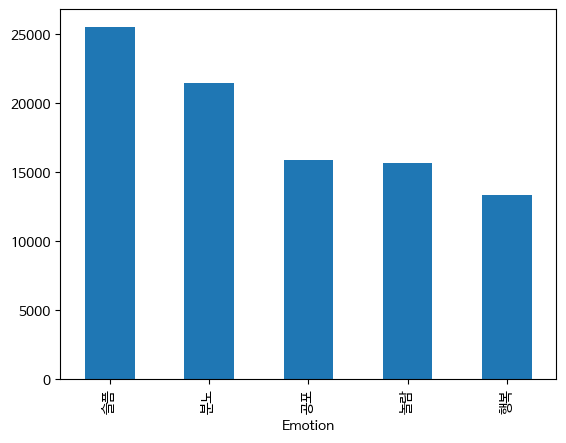

In [44]:
# label 개수 비교
df['Emotion'].value_counts().plot(kind='bar')
print(df.groupby('Emotion').size().reset_index(name='count'))

In [45]:
print(len(df[df['Emotion'] == '슬픔']) /len(df[df['Emotion'] == '행복']))

1.9097637559808613


Target Column label 별로 숫자 부여

In [46]:
# Emotion 컬럼 정수로 변환

emotion_dict = {'공포': 0, '놀람': 1, '분노': 2, '슬픔': 3, '행복': 4}
df['Emotion_dict'] = df['Emotion'].map(emotion_dict)
df.sample(10)

,Sentence,Emotion,Emotion_dict
54671,허리가 너무 아픈데 파스 붙여줄 사람이 없어서 서글퍼.,슬픔,3
26850,학교폭력 당하는 걸 부모님께 말씀드렸더니 속이 후련해. 마음이 훨씬 편해졌어.,행복,4
11717,이해할 수 없는 이유로 취업이 취소됐어. 너무 화가 나.,분노,2
75530,정말 고3이 되니 걱정태산입니다..,슬픔,3
61190,심각하게 고민되요,공포,0
41997,내가 학원을 안 다녀서 친구들이 그걸로 따돌리는 것 같은데 너무 괴로워.,놀람,1
43050,이제 좀 살만한데 암이라니 하늘이 무너지는 기분이야.,슬픔,3
56735,종합비타민 먹고 있는데 건강 챙기기에는 부족한 것 같아.,공포,0
31667,이번에 노인 대학에 다니게 됐는데 다행히 새로운 친구를 사귈 수가 있었어.,행복,4
63279,조언부탁드립니다,공포,0


In [47]:
# 합친 데이터 저장
df.to_csv('/content/Data/concated_df.csv', index=False)

In [48]:
# 확인
df = pd.read_csv('/content/Data/concated_df.csv')
df.sample(10)

,Sentence,Emotion,Emotion_dict
7960,친구랑 쇼핑 가서 마음에 드는 옷을 샀어.,행복,4
71674,국대오면 쎈척 리그가면 쥐죽은 양ㅅㄲ ㅋㅋㅋㅋㅋㅋㅋㅋ 누구? 네다흥,분노,2
59361,이 금액이 뭔지 아시나요??,공포,0
10493,아. 진짜 기분이 너무 나빠.,슬픔,3
2049,돈이 없으면 정말 괴롭고 불편하다.,슬픔,3
35316,요새 매일 운동을 해서 건강한 편이야. 운동을 하니 몸도 가볍고 기분도 좋네.,행복,4
85081,은지원이 말하는 좀비게임 대체 뭐길래 ㅋㅋㅋㅋㅋ핵궁금,행복,4
15830,티브이에서 광고하는 건강식품은 아무런 효과가 없는 것 같아.,공포,0
85113,웹디자인알바 일거리 구하기 어려우신 분들은재능마켓 활용해보세여 ^^,행복,4
78896,잘참고있었고 보내주어야된다고 다짐하고갑자기 지금 울음이터진다답답하다,슬픔,3


# Data Preprocessing

In [49]:
# 데이터 불러오기
df = pd.read_csv('/content/Data/concated_df.csv')
df.sample(10)

,Sentence,Emotion,Emotion_dict
88795,노무현때 당신이 했던 행동을 생각해라,분노,2
60724,그래도 아프잖아! 주사는 그냥 싫음,공포,0
64826,미쳐가는구나 다들...,놀람,1
68014,다른배우들도 하나같이연기 잘함,놀람,1
9140,이러다가 정말 결혼을 못 할 것 같아서 요즘 스트레스를 받는 것 같아.,공포,0
1534,엄마가 요즘 울기만 하는 것 같아서 걱정돼.,공포,0
84974,음주운전이랑 정씨면 다 나왔지 ㅋㅋㅋ,행복,4
88215,정부서 일하는 뭐 같은 놈들보다 훨~~~~씬 낫다.,분노,2
54702,병 때문에 일을 못 하니 갖고 있는 집 한 채의 세금 내는 것도 버거워.,공포,0
62332,제가 친구들이랑 있을때는 말도 많이 하고 그런데 물론 남고라서 여자 볼 일은 거의 ...,공포,0


In [50]:
# 모델링에 사용할 Sentence, Emotion_dict 컬럼만 사용
df = df[['Sentence', 'Emotion_dict']]
df.sample(10)

,Sentence,Emotion_dict
3712,코로나 때문에 활동량이 적어지니 몸컨디션이 좋지 않아.,3
85410,연상이좋지 징징되는 연하보단^^,4
25915,아들의 도움 없이는 생활비를 감당할 수 없어 슬퍼.,3
26376,정말 마음이 힘들다. 어제 친구랑 싸웠는데 계속 생각이 나네.,3
9655,남들은 욜로다 뭐다 즐기며 살 때도 미래를 보며 살았는데. 이제 와 보니 헛살은 거...,3
43463,오랫동안 일하던 직장에서 해고당했어. 나는 이제 쓸모없는 사람인가 봐.,3
20252,오늘도 회사에서 밤새야 할 것 같아.,3
62216,두테르테 이제 이슬람 학살하겠네;,0
33169,엄마가 오해했는지 내게 화를 냈어. 억울해.,3
84659,슈아오빠 원우오빠 태어나줘서 고마워요,4


KoBERT는 text, label 형식으로 입력해야하기 때문에 df 데이터 프레임의 Sentence와 Emotion_dict를 묶은 데이터셋을 생성

In [51]:
# text, label로 묶인 data list 생성
data_list = []
for q, label in zip(df['Sentence'], df['Emotion_dict'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

## Split train & test data set

In [52]:
# 데이터 분리 (Train & Test)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_list, test_size=0.2, random_state=2024, stratify=df['Emotion_dict'])
print(len(train_df))
print(len(test_df))

73628
18407


## Tokenization
KoBERT 오픈소스 내 예제 코드 및 블로그 참조

In [53]:
#  BERTDataset : 데이터가 BERT 모델의 입력으로 들어갈 수 있도록 tokenization, int encoding, padding하는 함수.
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))


In [54]:
# parameter setting
max_len = 100
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [55]:
# tokenizer 불러오기
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [56]:
# TypeError: BERTSentenceTransform.__init__() got an unexpected keyword argument 'vocab' 오류 해결 (KoBERT finetuning 오픈소스 예시 코드)
# BERTSentenceTransform 수정
class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')

In [57]:
# BERTDataset : 데이터가 BERT 모델의 입력으로 들어갈 수 있도록 tokenization, int encoding, padding하는 함수.
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [58]:
# BERTDataset에 split된 데이터 입력, input 형식에 맞도록 변환하기
# from kobert import get_tokenizer

# tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(train_df, 0, 1, tokenizer, vocab, max_len, True, False)
data_test = BERTDataset(test_df, 0, 1, tokenizer, vocab, max_len, True, False)

In [59]:
# 위에서 변환한 데이터를 torch 형식으로 변환
# torch 형식의 dataset을 만들어 입력 데이터셋의 전처리 마무리
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

# KoBERT 모델 구현

In [60]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 5,   # 감정 클래스 수로 조정 긍정/부정 클래스2개
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [61]:
# BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [62]:
# optimizer와 schedule 설정
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps = warmup_step, num_training_steps = t_total)


In [63]:
# calc_accuracy : 정확도 측정을 위한 함수
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

train_dataloader

# Model Training

In [64]:
train_history = []
test_history = []
loss_history = []

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        # print(label.shape, out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    # train_history.append(train_acc / (batch_id+1))

    # .eval() : nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
    # 즉, model이 Dropout이나 BatNorm2d를 사용하는 경우, train 시에는 사용하지만 evaluation을 할 때에는 사용하지 않도록 설정해주는 함수
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))


  0%|          | 0/1151 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.6015266180038452 train acc 0.28125
epoch 1 batch id 201 loss 1.3177053928375244 train acc 0.31786380597014924
epoch 1 batch id 401 loss 1.1137906312942505 train acc 0.43855205735660846
epoch 1 batch id 601 loss 0.8946335315704346 train acc 0.49550228785357736
epoch 1 batch id 801 loss 0.8536422252655029 train acc 0.5277387640449438
epoch 1 batch id 1001 loss 1.1169705390930176 train acc 0.5482486263736264
epoch 1 train acc 0.5598295736626536


  0%|          | 0/288 [00:00<?, ?it/s]

epoch 1 test acc 0.6476946447649572


  0%|          | 0/1151 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.9671902656555176 train acc 0.625
epoch 2 batch id 201 loss 1.0384260416030884 train acc 0.6478544776119403
epoch 2 batch id 401 loss 0.8854979276657104 train acc 0.6534055486284289
epoch 2 batch id 601 loss 0.666191041469574 train acc 0.6637635191347754
epoch 2 batch id 801 loss 0.6259840726852417 train acc 0.6719530274656679
epoch 2 batch id 1001 loss 0.9006742238998413 train acc 0.676948051948052
epoch 2 train acc 0.6804700105498324


  0%|          | 0/288 [00:00<?, ?it/s]

epoch 2 test acc 0.6582935474537037


  0%|          | 0/1151 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.7724435925483704 train acc 0.71875
epoch 3 batch id 201 loss 0.7562918663024902 train acc 0.7131529850746269
epoch 3 batch id 401 loss 0.8428022265434265 train acc 0.7163341645885287
epoch 3 batch id 601 loss 0.5049251914024353 train acc 0.7266014975041597
epoch 3 batch id 801 loss 0.4907059967517853 train acc 0.731585518102372
epoch 3 batch id 1001 loss 0.8528649210929871 train acc 0.7365915334665335
epoch 3 train acc 0.7393338091100906


  0%|          | 0/288 [00:00<?, ?it/s]

epoch 3 test acc 0.6629593460648148


  0%|          | 0/1151 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.6824755072593689 train acc 0.71875
epoch 4 batch id 201 loss 0.7347186803817749 train acc 0.7712997512437811
epoch 4 batch id 401 loss 0.684256374835968 train acc 0.7772365960099751
epoch 4 batch id 601 loss 0.3679043650627136 train acc 0.7869956322795341
epoch 4 batch id 801 loss 0.33168888092041016 train acc 0.7902816791510612
epoch 4 batch id 1001 loss 0.7876313924789429 train acc 0.7928633866133866
epoch 4 train acc 0.7942724494228621


  0%|          | 0/288 [00:00<?, ?it/s]

epoch 4 test acc 0.6670631343482906


  0%|          | 0/1151 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.5493041276931763 train acc 0.828125
epoch 5 batch id 201 loss 0.5751880407333374 train acc 0.8107120646766169
epoch 5 batch id 401 loss 0.516599714756012 train acc 0.8160847880299252
epoch 5 batch id 601 loss 0.39607128500938416 train acc 0.8241992512479202
epoch 5 batch id 801 loss 0.3001253008842468 train acc 0.8252769975031211
epoch 5 batch id 1001 loss 0.6844155192375183 train acc 0.8273289210789211
epoch 5 train acc 0.8271320745935212


  0%|          | 0/288 [00:00<?, ?it/s]

epoch 5 test acc 0.6644589676816239


# Model Test

In [67]:
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)

    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("공포가")
            elif np.argmax(logits) == 1:
                test_eval.append("놀람이")
            elif np.argmax(logits) == 2:
                test_eval.append("분노가")
            elif np.argmax(logits) == 3:
                test_eval.append("슬픔이")
            elif np.argmax(logits) == 4:
                test_eval.append("행복이")

        print(">> 입력하신 내용에서 " + test_eval[0] + " 느껴집니다.")

'공포': 0, '놀람': 1, '분노': 2, '슬픔': 3, '행복': 4

In [69]:
#질문 무한반복하기! 0 입력시 종료
end = 1
while end == 1 :
    sentence = input("하고싶은 말을 입력해주세요 : ")
    if sentence == "0" :
        break
    predict(sentence)
    print("\n")

하고싶은 말을 입력해주세요 : 모기 언제 멸종해
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 발 흔들지마 복나가
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : ...
>> 입력하신 내용에서 놀람이 느껴집니다.


하고싶은 말을 입력해주세요 : ?
>> 입력하신 내용에서 놀람이 느껴집니다.


하고싶은 말을 입력해주세요 : 달디단 밤양갱
>> 입력하신 내용에서 행복이 느껴집니다.


하고싶은 말을 입력해주세요 : 쓰디쓴 쑥양갱
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 야 왜 밤양갱은 행복이고 쑥양갱은 분노야 똑바로 안해?
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 아이 팬더 때려잡기 너무 신나~
>> 입력하신 내용에서 행복이 느껴집니다.


하고싶은 말을 입력해주세요 : 널 어째야 좋을까
>> 입력하신 내용에서 슬픔이 느껴집니다.


하고싶은 말을 입력해주세요 : 좀 더 나은 모델이 되도록 내가 어떻게든 더 해봐야지
>> 입력하신 내용에서 슬픔이 느껴집니다.


하고싶은 말을 입력해주세요 : 배불러
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 배불러!
>> 입력하신 내용에서 행복이 느껴집니다.


하고싶은 말을 입력해주세요 : 배불러ㅡㅡ
>> 입력하신 내용에서 행복이 느껴집니다.


하고싶은 말을 입력해주세요 : 배불러ㅠㅠ
>> 입력하신 내용에서 행복이 느껴집니다.


하고싶은 말을 입력해주세요 : 너 이모티콘 가지고도 분류해..?
>> 입력하신 내용에서 놀람이 느껴집니다.


하고싶은 말을 입력해주세요 : 땃쉬
>> 입력하신 내용에서 슬픔이 느껴집니다.


하고싶은 말을 입력해주세요 : 받을건 이미 진작에 다 받았지롱
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 이게 왜 분노야 똑바로 안해?
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 :